# Introduction

For this project, I will interpret data from the National Parks Service about endangered species in different parks of the United States.

I will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, I will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

## Scoping
It is always important to create a project scope to start a new project. The scope will consist of four steps: project goals, actions and data, analysis, and the evaluation of each step to build conclusions and to communicate findings in a more effective way.

### 1. Project goals

The goals for this project are the following:

-Perform Data Analysis on the conservation statuses of the different species of the National Park Service dataset.
-Investigate if there are any patterns or themes to the types of species that become endangered.
-Understand the characteristics about the species and their conservations status, and those species and their relationship to the national parks.

### 2. Actions and Data

The actions that will be followed to work toward the goals of the project are the analysis of the two datasets provided by CodeCademy.com, called Observations.csv and Species_info.csv, as well as one third dataset, Joined_table.csv, that consists of the two previous one joined together, to get even more insightful information.


### 3. Analysis

Initially, the analysis will be conducted on the following questions:

- How many species are in each type of conservation status? How is it distributed?
- Which category of species are the most endangered? Which one are the least ones?
- Which park has seen the most endangered species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent among observations and what is their distribution amongst parks?
- Which endangered species has been the most seen at all parks? And at each park? VER AL FINAL


### 4. Evaluation
Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.



# Import the Modules

The first thing to do, is to import the Python Modules to be used in this project.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Load the Data

To begin our work, we will import the datasets which will be used to work with.

In this case, the dataset will be three:
### Observations.csv dataset:
This file contains information from sightings of species at four national parks in the last 7 days. The columns are the following:

-**scientific_name**: The name of each species.

-**park_name**: The National Park where the specific sightings have been recorded.

-**observations**: The number of observations in the 7-day period.

In the same line where we read the .csv file with the pandas library, I am also dropping the duplicate values.

In [2]:
observations = pd.read_csv('observations.csv').drop_duplicates().reset_index()
observations.head()

,index,scientific_name,park_name,observations
0,0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,1,Neovison vison,Great Smoky Mountains National Park,77
2,2,Prunus subcordata,Yosemite National Park,138
3,3,Abutilon theophrasti,Bryce National Park,84
4,4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [3]:
#We also can see the lenght of this dataset, and look if there are any empty values.
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23281 entries, 0 to 23280
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            23281 non-null  int64 
 1   scientific_name  23281 non-null  object
 2   park_name        23281 non-null  object
 3   observations     23281 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 727.7+ KB


### Species_info.csv dataset:
This file contains information of the species that has been seen around the National Parks. The columns are the following:

-**category**: The category in which the species are classified.

-**scientific_name**: The name of each species.

-**common_names**: The common name for each species.

-**conservation_status**: The level of endangerment (or not) of each species.

In this case, I focused in dropping the duplicate values taking the scientific_name column, to be sure I am not working with the same species two times in the same dataset.

In [4]:
species_info = pd.read_csv("species_info.csv").drop_duplicates(subset = ['scientific_name']).reset_index()
species_info.head(5)

,index,category,scientific_name,common_names,conservation_status
0,0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,1,Mammal,Bos bison,"American Bison, Bison",NaN
2,2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Domesticated Cattle",NaN
3,3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [5]:
#Printing the table info, we gain our first insight of this dataset. Only 178 entries of this table are of endangered species.

print(species_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5541 entries, 0 to 5540
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                5541 non-null   int64 
 1   category             5541 non-null   object
 2   scientific_name      5541 non-null   object
 3   common_names         5541 non-null   object
 4   conservation_status  178 non-null    object
dtypes: int64(1), object(4)
memory usage: 216.6+ KB
None


In [6]:
#With an SQL statement (made in DB Browser for SQLite), I made a cross join of both datasets, into another .csv file, called joined_table
joined_table = pd.read_csv("joinedtable.csv").drop_duplicates().reset_index()
joined_table.head()

,index,scientific_name,common_names,category,park_name,observations,conservation_status
0,0,Vicia benghalensis,"Purple Vetch, Reddish Tufted Vetch",Vascular Plant,Great Smoky Mountains National Park,68,NaN
1,1,Neovison vison,American Mink,Mammal,Great Smoky Mountains National Park,77,NaN
2,2,Prunus subcordata,Klamath Plum,Vascular Plant,Yosemite National Park,138,NaN
3,3,Abutilon theophrasti,Velvetleaf,Vascular Plant,Bryce National Park,84,NaN
4,4,Githopsis specularioides,Common Bluecup,Vascular Plant,Great Smoky Mountains National Park,85,NaN


## Analyzing the datasets

The first thing to do was exploring the species dataset to find out how many categories are on it. Also, I found out how many conservation statuses were, and how many of the 5541 species were in each conservation status.

In [7]:
print("Number of categories: " + str(species_info.category.nunique()))
different_categories = species_info.category.unique()
print("The different categories in the species dataset are: {}".format(different_categories))

Number of categories: 7
The different categories in the species dataset are: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [8]:
#I quickly found out that the Vascular Plants were by far the most common category on this dataset.

species_info.groupby('category').size().sort_values(ascending=False)

category
Vascular Plant       4262
Bird                  488
Nonvascular Plant     333
Mammal                176
Fish                  125
Amphibian              79
Reptile                78
dtype: int64

After the first look on the categories, I wanted to see how many of the species are in a danger situation. As the National Parks Service should be more interested in this kind of species rather than the ones which are not endangered, I left the NaN column aside for now, so the graphs could represent better what they should want to see.

In [9]:
types_of_conservation = species_info.conservation_status.unique()
print("The different types of conservation statuses are: "+ str(types_of_conservation))

The different types of conservation statuses are: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [10]:
conservation_status_count = species_info.groupby("conservation_status").index.count()
conservation_status_sorted = conservation_status_count.sort_values(ascending = False)
print(conservation_status_sorted)

conservation_status
Species of Concern    151
Endangered             15
Threatened              9
In Recovery             3
Name: index, dtype: int64


With this information, I went on to make the first visualization. The pie chart can make a good impression about how the Species of Concern are a lot more than any other category of species in danger.

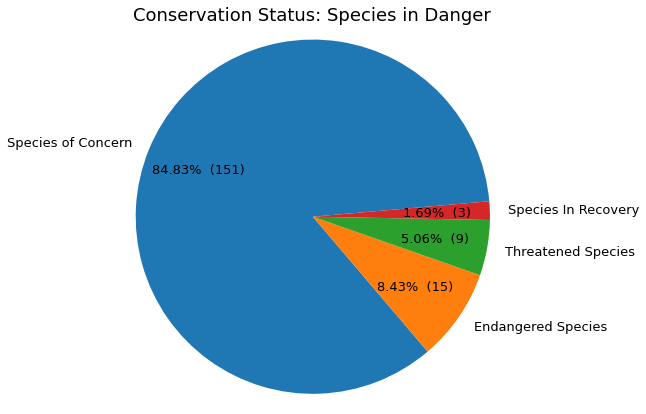

In [11]:
species_of_concern = 0
endangered = 0
threatened = 0
in_recovery = 0
not_endangered = 0

for item in species_info.conservation_status:
    if item == "Species of Concern":
        species_of_concern +=1
    elif item == "Endangered":
        endangered += 1
    elif item == "Threatened":
        threatened +=1
    elif item == "In Recovery":
        in_recovery += 1
    else:
        not_endangered +=1
        
list_to_bar = [species_of_concern, endangered, threatened,in_recovery]
labels_to_bar = "Species of Concern", "Endangered Species", "Threatened Species", "Species In Recovery"

def make_autopct(values):
       def my_autopct(pct):
           total = sum(values)
           val = int(round(pct*total/100.0))
           return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
       return my_autopct

plt.figure(figsize = (7,7))
plt.pie(list_to_bar, labels = labels_to_bar, autopct = make_autopct(list_to_bar), pctdistance =0.7, startangle = 5,  textprops={'fontsize': 13})
plt.axis("equal")
plt.title("Conservation Status: Species in Danger", fontsize = (18))
plt.show()

A second graph was really useful to be added here. I just showed how is the distribution of the conservation status among species in danger. Then, I made a bar plot of the amount of each category of species that was in danger to be extinct.

category
Bird                 75
Vascular Plant       46
Mammal               30
Fish                 10
Amphibian             7
Reptile               5
Nonvascular Plant     5
Name: conservation_status, dtype: int64


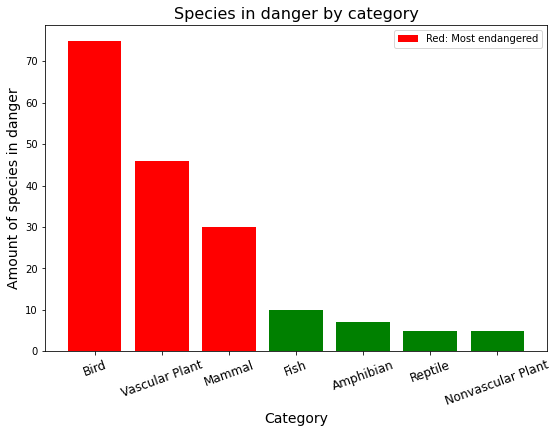

In [12]:
most_endangered = species_info.groupby("category").conservation_status.count()
most_endangered_sorted = most_endangered.sort_values(ascending = False)
print(most_endangered_sorted)
labels = ['Bird', 'Vascular Plant', 'Mammal', 'Fish', 'Amphibian', 'Reptile', 'Nonvascular Plant']


plt.figure(figsize = (9,6))
ax = plt.subplot(1,1,1)
plt.bar(range(len(most_endangered_sorted)), most_endangered_sorted, color = ['red', 'red', 'red', 'green', 'green', 'green', 'green'])
plt.xlabel("Category", size = 14)
plt.ylabel("Amount of species in danger", size = 14)
plt.title("Species in danger by category", size = 16)
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation = 20, size = 12)
plt.legend(["Red: Most endangered"])
plt.show()

After this two graphics, I made one more bar plot combining all this information in one visualization. Here, we can get even more insights to share in the evaluation section.

In [13]:
conservationcategories = species_info.groupby(["conservation_status", "category"]).scientific_name.count().unstack()

conservationcategories

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,6.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,NaN,NaN,NaN,NaN
Species of Concern,4.0,68.0,4.0,22.0,5.0,5.0,43.0
Threatened,2.0,NaN,3.0,2.0,NaN,NaN,2.0


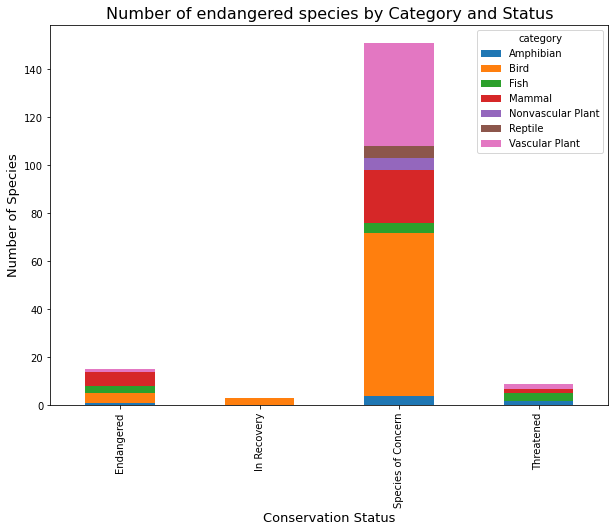

In [14]:
ax = conservationcategories.plot.bar(figsize=(10,7), stacked=True)
plt.xlabel("Conservation Status", size = 13)
plt.ylabel("Number of Species", size = 13)
plt.title("Number of endangered species by Category and Status", size = 16)
plt.show()

One more question I made myself about the number of species in danger was how many of each category were actually on their way to become extinct if no action is taken. The percentage here was the best statistic to use to find this out.

In [15]:
species_info.fillna('Not in danger', inplace = True)
species_info['is_in_danger'] = species_info.conservation_status != 'Not in danger'

danger_count = species_info.groupby(['category', 'is_in_danger']).scientific_name.nunique().reset_index()
danger_pivoted = danger_count.pivot(columns='is_in_danger',
                                      index='category',
                                      values='scientific_name').reset_index()
danger_pivoted.columns = ['category', 'not_in_danger', 'is_in_danger']
danger_pivoted['percentage'] = round((danger_pivoted.is_in_danger/(danger_pivoted.is_in_danger + danger_pivoted.not_in_danger) * 100),2)
print(danger_pivoted)

            category  not_in_danger  is_in_danger  percentage
0          Amphibian             72             7        8.86
1               Bird            413            75       15.37
2               Fish            115            10        8.00
3             Mammal            146            30       17.05
4  Nonvascular Plant            328             5        1.50
5            Reptile             73             5        6.41
6     Vascular Plant           4216            46        1.08


This calculation showed me that the amount of species in each category had nothing to do with the percentage of the categories' species in danger.

After reaching this point, it was a good idea to run some hypothesis tests to see if the different categories have statistically significant differences in their conservation status rates. I worked with the **Chi Square test**. The confidence interval I looked for was 95%, so the result of this hypothesis test needed to show a p-value of less of 0.05 to know these differences were not just simply by random chance. 

In [16]:
amphibianvsmammal = [[72,7], [146,30]]
_,pval,_,_ = stats.chi2_contingency(amphibianvsmammal)
print (pval)
if pval <= 0.05:
    print("I can be reasonably sure that the difference between both conservation rates is NOT simply showed by random chance")
else:
    print("I can be reasonably sure that the difference between both conservation rates is simply showed by random chance")

0.12757669693198975
I can be reasonably sure that the difference between both conservation rates is simply showed by random chance


In [17]:
reptilesvsmammal = [[73,5], [146,30]]
_,pval,_,_ = stats.chi2_contingency(reptilesvsmammal)
print (pval)
if pval <= 0.05:
    print("I can be reasonably sure that the difference between both conservation rates is NOT simply showed by random chance")
else:
    print("I can be reasonably sure that the difference between both conservation rates is simply showed by random chance")

0.03835559022969898
I can be reasonably sure that the difference between both conservation rates is NOT simply showed by random chance


In [18]:
vascularvsnonvascular = [[4216,46], [328,5]]
_,pval,_,_ = stats.chi2_contingency(vascularvsnonvascular)
print (pval)
if pval <= 0.05:
    print("I can be reasonably sure that the difference between both conservation rates is NOT simply showed by random chance")
else:
    print("I can be reasonably sure that the difference between both conservation rates is simply showed by random chance")

0.6623419491381985
I can be reasonably sure that the difference between both conservation rates is simply showed by random chance


In [19]:
birdvsfish = [[413,75], [115,10]]
_,pval,_,_ = stats.chi2_contingency(birdvsfish)
print (pval)
if pval <= 0.05:
    print("I can be reasonably sure that the difference between both conservation rates is NOT simply showed by random chance")
else:
    print("I can be reasonably sure that the difference between both conservation rates is simply showed by random chance")

0.047482425302318096
I can be reasonably sure that the difference between both conservation rates is NOT simply showed by random chance


After all this work with the species dataset, I combined both datasets to find out how many observations of each species were done in the last 7 days in each park.

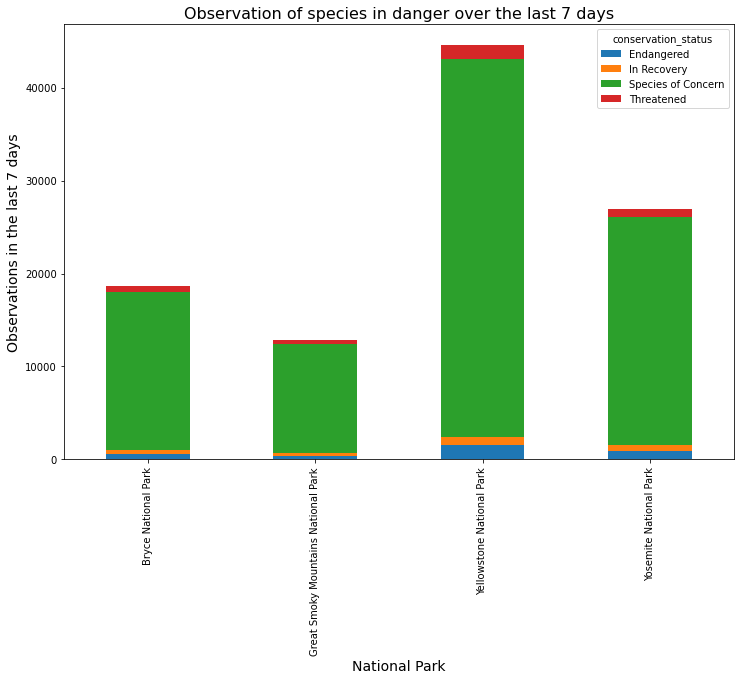

In [20]:
observations_7 = joined_table.groupby(['park_name','conservation_status']).observations.sum().unstack()
ax = observations_7.plot.bar(figsize = (12,8),stacked = True)
plt.xlabel("National Park", size = 14)
plt.ylabel("Observations in the last 7 days", size = 14)
plt.title("Observation of species in danger over the last 7 days", size = 16)
plt.show()

In [21]:
most_in_gs_mountains = observations[observations.park_name == 'Great Smoky Mountains National Park'].groupby('scientific_name').observations.sum().sort_values(ascending = False)
most_in_gs_mountains.head()

scientific_name
Streptopelia decaocto    256
Procyon lotor            247
Castor canadensis        243
Puma concolor            239
Fragaria virginiana      217
Name: observations, dtype: int64

The next thing I did with the observations table was creating a table to quickly find out which species were the most and least observed and where. In the table created below, with one simple statement it can be sorted by the observations at a specific park, which can be really useful to work with it in a dynamic way.

In [22]:
observed = observations.groupby('scientific_name').observations.sum().sort_values(ascending = False).reset_index()
observed_by_park = observations.groupby(['scientific_name', 'park_name']).observations.sum().sort_values(ascending = False).reset_index()
observed_by_park_pivot = observed_by_park.pivot(columns = 'park_name',
                                                          index = 'scientific_name',
                                                         values = 'observations')
observed_by_park_pivot['total_observations'] = observed_by_park_pivot.sum(axis=1)
most_observed_total = observed_by_park_pivot.sort_values(by = 'total_observations', ascending = False)
most_observed_total.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observations
scientific_name,,,,,
Holcus lanatus,296,216,805,463,1780
Castor canadensis,278,243,703,501,1725
Hypochaeris radicata,294,195,726,505,1720
Puma concolor,311,239,753,408,1711
Procyon lotor,247,247,745,453,1692


I spent more time with this table, searching for the least observed of the species, and also the most observed at each park.

In [23]:
least_observed_total = observed_by_park_pivot.sort_values(by = 'total_observations', ascending = True)
least_observed_total.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observations
scientific_name,,,,,
Grus americana,24,13,57,37,131
Canis rufus,30,13,60,34,137
Vermivora bachmanii,20,18,58,45,141
Noturus baileyi,22,23,67,31,143
Rana sierrae,31,11,60,42,144


In [24]:
most_observed_bryce = observed_by_park_pivot.sort_values(by = 'Bryce National Park', ascending = False)
most_observed_bryce.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observations
scientific_name,,,,,
Columba livia,339,169,722,423,1653
Puma concolor,311,239,753,408,1711
Avena sativa,303,171,453,318,1245
Streptopelia decaocto,301,256,516,457,1530
Myotis lucifugus,298,174,679,396,1547


In [25]:
most_observed_gsmountains = observed_by_park_pivot.sort_values(by = 'Great Smoky Mountains National Park', ascending = False)
most_observed_gsmountains.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observations
scientific_name,,,,,
Streptopelia decaocto,301,256,516,457,1530
Procyon lotor,247,247,745,453,1692
Castor canadensis,278,243,703,501,1725
Puma concolor,311,239,753,408,1711
Fragaria virginiana,211,217,487,255,1170


In [26]:
most_observed_yellowstone = observed_by_park_pivot.sort_values(by = 'Yellowstone National Park', ascending = False)
most_observed_yellowstone.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observations
scientific_name,,,,,
Holcus lanatus,296,216,805,463,1780
Puma concolor,311,239,753,408,1711
Procyon lotor,247,247,745,453,1692
Hypochaeris radicata,294,195,726,505,1720
Columba livia,339,169,722,423,1653


In [27]:
most_observed_yosemite = observed_by_park_pivot.sort_values(by = 'Yosemite National Park', ascending = False)
most_observed_yosemite.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observations
scientific_name,,,,,
Hypochaeris radicata,294,195,726,505,1720
Castor canadensis,278,243,703,501,1725
Holcus lanatus,296,216,805,463,1780
Streptopelia decaocto,301,256,516,457,1530
Procyon lotor,247,247,745,453,1692


In [28]:
least_observed_bryce = observed_by_park_pivot.sort_values(by = 'Bryce National Park', ascending = True)
least_observed_bryce.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observations
scientific_name,,,,,
Corydalis aurea,9,92,253,141,495
Vermivora bachmanii,20,18,58,45,141
Ovis canadensis sierrae,22,25,67,39,153
Noturus baileyi,22,23,67,31,143
Chasmistes liorus,23,23,65,35,146


In [29]:
least_observed_gsmountains = observed_by_park_pivot.sort_values(by = 'Great Smoky Mountains National Park', ascending = True)
least_observed_gsmountains.head()

park_name,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park,total_observations
scientific_name,,,,,
Collomia tinctoria,81,10,242,208,541
Rana sierrae,31,11,60,42,144
Strix occidentalis,88,11,252,151,502
Sambucus mexicana,127,12,232,141,512
Seiurus aurocapilla,86,13,216,136,451


This information (specially about the species that were the least seen) was really useful, but I needed some context. Which was the situation of these species? I created a function to throw the scientific name and get in return its information.

In [30]:
def search_info(species_name):
    return species_info[species_info.scientific_name == species_name]

search_info('Corydalis aurea')

,index,category,scientific_name,common_names,conservation_status,is_in_danger
4141,4310,Vascular Plant,Corydalis aurea,"Golden Corydalis, Scrambled Eggs",Not in danger,False


In [31]:
search_info('Collomia tinctoria')

,index,category,scientific_name,common_names,conservation_status,is_in_danger
4854,5095,Vascular Plant,Collomia tinctoria,"Staining Collomia, Yellowstain Collomia",Not in danger,False


In [32]:
search_info('Canis rufus')

,index,category,scientific_name,common_names,conservation_status,is_in_danger
9,9,Mammal,Canis rufus,Red Wolf,Endangered,True


In [33]:
search_info('Grus americana')

,index,category,scientific_name,common_names,conservation_status,is_in_danger
173,173,Bird,Grus americana,Whooping Crane,Endangered,True


## Conclusion

All the analysis done led me to the following findings:

- Of the 5541 species of the dataset, 178 were in a danger situation (only a 3%).
- Most of the species in danger are in a species of concern status, and only 3 of the 178 are in recovery right now.
- Birds, vascular plants and mammals are the three categories more endangered in this dataset. Even though there is a huge amount of vascular plants on this dataset, there are more bird species that need attention.
- There three species in recovery are birds. It is still a small percentage if we compare to how many birds are in danger.
- Birds and mammals have more than 15% of their species in a danger situation. This number seems to be critic and need attention.
- The Chi Square Tests conducted before made me reasonably sure that mammals have more tendency to become endangered than reptiles, and the same goes to the birds over the fish species.
- Yellowstone was the park with the most observation of species in the last seven days.
- The Holcus Lanatus was the species more seen in the last seven days, because of their high number of observations in Yellowstone and in Yosemite.
- The Grus americana, an endangered bird, was the least seen at the parks. The second one, the Canis rufus, is also endangered.
- The two species with the least observations at one specific park are not endangered. The possible explanation is that the two biggest parks hosts a bigger number of species individuals.  

## Questions to solve in the future

This items can be further analyzed with a more contextual information or in future investigations:

- Are the number of species in danger increasing? Or this number decreased over the latest days/months?
- How big are the four parks? Is Yellowstone so much bigger than the rest of them? Is that the answer to why most observations are made there?
- The Corydalis aurea was only seen nine times in seven days at the Bryce National Park. An additional study can be conducted at that park to see if it is on it way to be extinct there. However, it has been spotted a lot of times in the other parks.